# Predicting Health Insurance Price for an individual or family

## Introduction

The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Hence, one insurance company hired you as a data scientist to predict the health insurance cost for possible future customers. They have already collected samples required to perform all data analysis and machine learning tasks. Your task is to perform all data analysis steps and finally create a machine learning model which can predict the health insurance cost.

## Problem Statement

Given specific factors, our goal is to estimate the actual health insurance price for individuals or families when acquiring health insurance.

## Impact on Business:

Due to inaccurate insurance price the companies may end up in underestimation of healthcare cost,resulting in insufficent premium to cover medical expenses,administration costs and overhead costs leads to financial losses.The cost of prediction may attract high risk customers which may leads to high claims cost.

## Challenges to face:

Inacurate insurance pricing creates multiple challenges for organizations, including financial losses from underpricing or overpricing policies, frequency and scale of claims, compliance risks, damaging customer trust and loyalty, and barriers to effective risk management.

## About Data

**Variables in the dataset:**

**age**: age of the primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: number of children covered by health insurance, number of dependents

**smoker**: smoking or not

**region**: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

**charges**: individual medical costs billed by health insurance



Data analysis approach

What approach are you going to take to prove or disprove your hypothesis?

What feature engineering techniques will be relevant to your project?

Please justify your data analysis approach.

Identify essential patterns in your data using the EDA approach to justify your findings.



In [76]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import missingno as msno
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# load the data
data = pd.read_excel("C:\\Users\\soumya\\Downloads\\Health_insurance_cost.xlsx")

In [78]:
data.shape

(1338, 7)

 There are total 1338 Observations and 7 variables in the dataset.

In [79]:
data.head()   # To see first 5 rows from the top

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


we can see NAN in BMI

In [80]:
data.tail() # To see last 5 rows from the bottom

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [81]:
data.sample(5) # to see random rows 

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1250,24.0,male,29.83,0,yes,northeast,18648.42170
293,22.0,female,28.82,0,no,southeast,2156.75180
199,64.0,female,39.33,0,no,northeast,14901.51670
382,NaN,male,33.00,0,no,southeast,20781.48892
1146,60.0,male,32.80,0,yes,southwest,52590.82939


In [82]:
data.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

In [83]:
data.drop_duplicates(inplace = True)

In [84]:
data.describe()

,age,BMI,Children,health_insurance_price
count,1309.000000,1314.000000,1337.000000,1335.000000
mean,39.181818,30.638253,1.095737,13277.238554
std,14.049681,6.112628,1.205571,12113.150034
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.205000,0.000000,4746.698450
50%,39.000000,30.305000,1.000000,9386.161300
75%,51.000000,34.580000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


In [85]:
data.describe(include = ['bool','object'])

,gender,smoking_status,location
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [86]:
data.info()    # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1309 non-null   float64
 1   gender                  1337 non-null   object 
 2   BMI                     1314 non-null   float64
 3   Children                1337 non-null   int64  
 4   smoking_status          1337 non-null   object 
 5   location                1337 non-null   object 
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


- we have 4 numeric columns and 3 categorical. the age column should be an integer but it is in float.
- Children column should be in category type but it is in int.

In [87]:
data.describe()

,age,BMI,Children,health_insurance_price
count,1309.000000,1314.000000,1337.000000,1335.000000
mean,39.181818,30.638253,1.095737,13277.238554
std,14.049681,6.112628,1.205571,12113.150034
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.205000,0.000000,4746.698450
50%,39.000000,30.305000,1.000000,9386.161300
75%,51.000000,34.580000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


- The primary benefiary of health insurance were between the age of 18 and 64.
- The avg BMI of the people is 30.64
- The no of childrens in a family are of min of 0 to max of 5.
- In the health_insurance_price 25 % of customers pay above 16604.

In [88]:
data.describe(include=['object','bool'])

,gender,smoking_status,location
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


- The more no of customer taking insurance were males. and most of the numbers are non smokers.
- The most customers are from the southeast region.

In [89]:
data = data.rename(columns = {'age':'Age','gender':'Sex','smoking_status':'Smoking_status','location':'Region',
                               'health_insurance_price':'Charges'})

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1309 non-null   float64
 1   Sex             1337 non-null   object 
 2   BMI             1314 non-null   float64
 3   Children        1337 non-null   int64  
 4   Smoking_status  1337 non-null   object 
 5   Region          1337 non-null   object 
 6   Charges         1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


In [91]:
# Define the list of columns for which you want to print unique values
columns = ['Age', 'Sex', 'BMI','Children','Smoking_status', 'Region', 'Charges']

# Iterate over the columns and print unique values in a tabular form
for column in columns:
    unique_values = data[column].unique()
    unique_values_count = len(unique_values)

    print(f"Column: {column}")
    print(f"Number of unique values: {unique_values_count}")
    print("Unique values in: {}".format(column))
    for value in unique_values:
        print(value)
    print("-----------------------")
    print("\n")


Column: Age
Number of unique values: 48
Unique values in: Age
19.0
18.0
28.0
33.0
32.0
31.0
46.0
37.0
60.0
25.0
62.0
23.0
56.0
27.0
52.0
30.0
34.0
59.0
nan
55.0
22.0
63.0
26.0
35.0
24.0
41.0
38.0
36.0
21.0
48.0
40.0
58.0
53.0
43.0
64.0
20.0
61.0
44.0
57.0
29.0
45.0
54.0
49.0
47.0
51.0
42.0
50.0
39.0
-----------------------


Column: Sex
Number of unique values: 2
Unique values in: Sex
female
male
-----------------------


Column: BMI
Number of unique values: 546
Unique values in: BMI
nan
33.77
33.0
22.705
28.88
25.74
33.44
27.74
29.83
25.84
26.22
26.29
34.4
39.82
42.13
24.6
30.78
23.845
40.3
35.3
36.005
32.4
34.1
31.92
28.025
27.72
23.085
32.775
17.385
36.3
35.6
26.315
28.6
28.31
36.4
20.425
32.965
20.8
36.67
39.9
26.6
36.63
21.78
30.8
37.05
37.3
38.665
34.77
24.53
35.2
35.625
33.63
28.0
34.43
28.69
36.955
31.825
31.68
22.88
27.36
33.66
24.7
25.935
22.42
28.9
39.1
36.19
23.98
24.75
28.5
28.1
32.01
27.4
34.01
29.59
35.53
39.805
26.885
38.285
37.62
41.23
34.8
22.895
31.16
27.2
26.98
39.4

From the above steps it is clear that our data do not contain any unnecessary values or missing values in any other format.

# Dealing with missing values

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1309 non-null   float64
 1   Sex             1337 non-null   object 
 2   BMI             1314 non-null   float64
 3   Children        1337 non-null   int64  
 4   Smoking_status  1337 non-null   object 
 5   Region          1337 non-null   object 
 6   Charges         1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


In [93]:
data.describe(include = 'all')

,Age,Sex,BMI,Children,Smoking_status,Region,Charges
count,1309.000000,1337,1314.000000,1337.000000,1337,1337,1335.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.181818,NaN,30.638253,1.095737,NaN,NaN,13277.238554
std,14.049681,NaN,6.112628,1.205571,NaN,NaN,12113.150034
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.205000,0.000000,NaN,NaN,4746.698450
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16622.107580


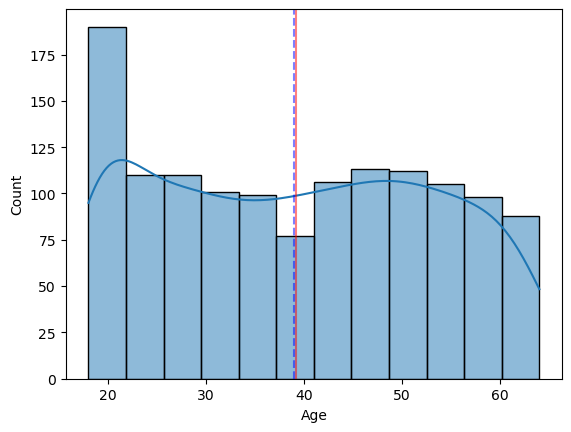

In [94]:
sns.histplot(data = data['Age'],kde = True)
plt.axvline(x = data['Age'].mean(),color = 'red',alpha = 0.5,label = 'Mean')
plt.axvline(x = data['Age'].median(),color = 'blue',ls = '--',alpha = 0.5,label = 'Median')
plt.show()

we can see the distribution of Age variable where mean and median are in equal range.from this we can notice that the data is normal distributed.

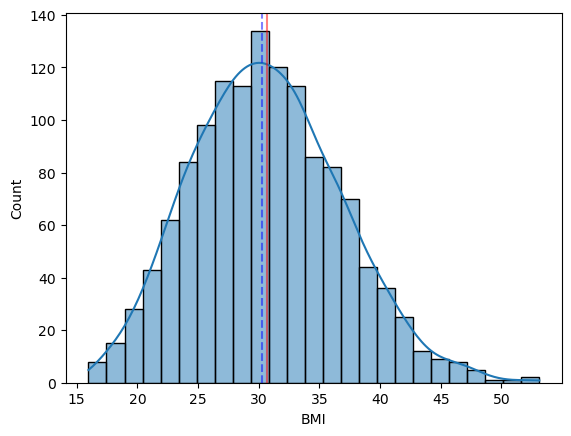

In [95]:
sns.histplot(data = data['BMI'],kde = True)
plt.axvline(x = data['BMI'].mean(),color = 'red',alpha = 0.5,label = 'Mean')
plt.axvline(x = data['BMI'].median(),color = 'blue',ls = '--',alpha = 0.5,label = 'Median')
plt.show()

BMI variable is distributed normally the shape of histogram is bell coleman which suggests that data is normal distributed

In [96]:
data.Age[data.Age == 0] # values with zero

Series([], Name: Age, dtype: float64)

In [97]:
data.Age[np.isnan(data.Age)] # values with nan values

26     NaN
80     NaN
138    NaN
214    NaN
259    NaN
309    NaN
337    NaN
382    NaN
445    NaN
480    NaN
527    NaN
599    NaN
640    NaN
703    NaN
765    NaN
802    NaN
893    NaN
909    NaN
936    NaN
955    NaN
1031   NaN
1048   NaN
1083   NaN
1133   NaN
1217   NaN
1248   NaN
1273   NaN
1308   NaN
Name: Age, dtype: float64

In [98]:
data.isnull().mean()*100

Age               2.094241
Sex               0.000000
BMI               1.720269
Children          0.000000
Smoking_status    0.000000
Region            0.000000
Charges           0.149589
dtype: float64

The variables such as Age,BMI,Charges we can see missing values which are extremely small less than 5%.hence,we can remove the missing values or we can perform imputation technique and we can compare them at the end.

In [99]:
data.dropna(subset = ['Charges'],inplace = True)
#data.dropna(subset = ['Age','BMI'],inplace = True)

In [100]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [101]:
data.isnull().mean()*100

Age               0.0
Sex               0.0
BMI               0.0
Children          0.0
Smoking_status    0.0
Region            0.0
Charges           0.0
dtype: float64

# Outliers

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

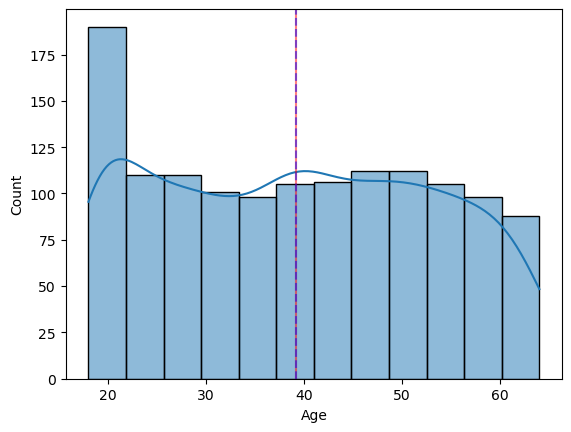

In [103]:
sns.histplot(data = data['Age'],kde = True)
plt.axvline(x = data['Age'].mean(),color = 'red',alpha = 0.5,label = 'Mean')
plt.axvline(x = data['Age'].median(),color = 'blue',ls = '--',alpha = 0.5,label = 'Median')
plt.show()

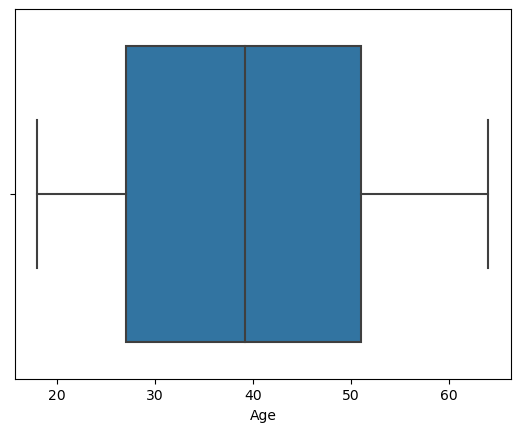

In [104]:
sns.boxplot(data = data,x = 'Age')
plt.show()

It is notable that feature 'Age' is normal distributed.

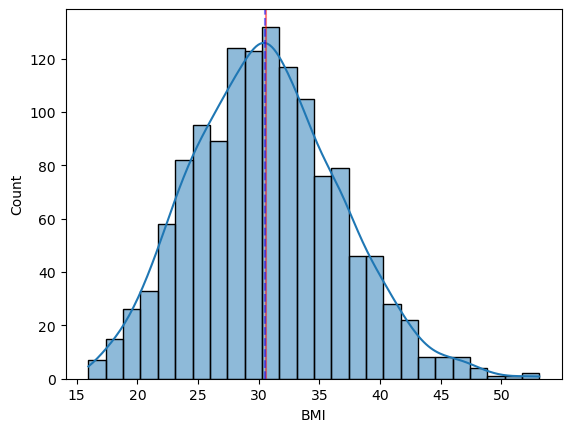

In [105]:
sns.histplot(data = data['BMI'],kde = True)
plt.axvline(x = data['BMI'].mean(),color = 'red',alpha = 0.5,label = 'Mean')
plt.axvline(x = data['BMI'].median(),color = 'blue',ls = '--',alpha = 0.5,label = 'Median')
plt.show()

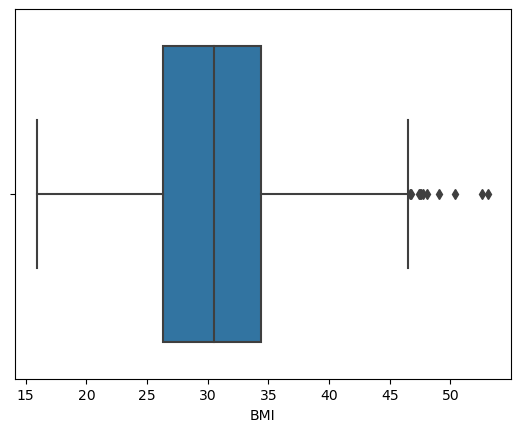

In [106]:
sns.boxplot(data,x = 'BMI')
plt.show()

The feature 'BMI' contains the few outliers which doesn't impact the overall distribution we can see that in histplot.`

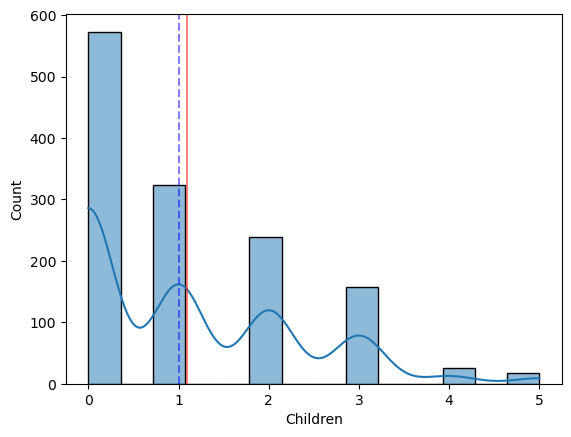

In [107]:
sns.histplot(data = data['Children'],kde = True)
plt.axvline(x = data['Children'].mean(),color = 'red',alpha = 0.5,label = 'Mean')
plt.axvline(x = data['Children'].median(),color = 'blue',ls = '--',alpha = 0.5,label = 'Median')
plt.show()

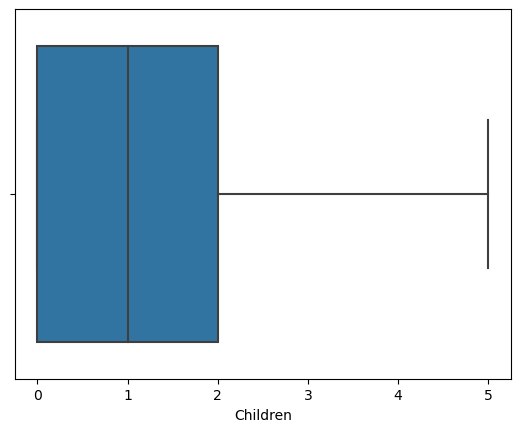

In [108]:
sns.boxplot(data,x = 'Children')
plt.show()

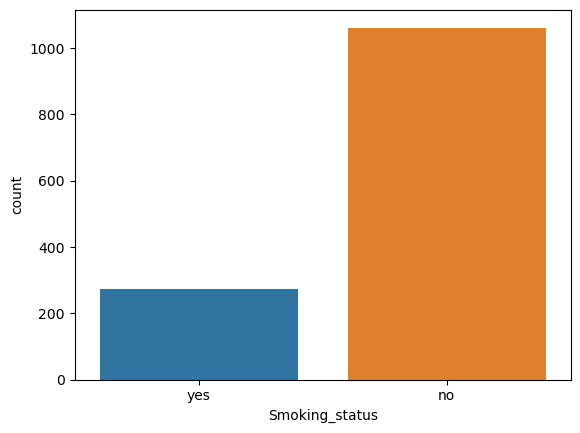

In [109]:
sns.countplot(x = data['Smoking_status'])
plt.show()

The distribution of smoking_status is abnormal where more no of customers with no smoking habit annd few of them have smoking habit.

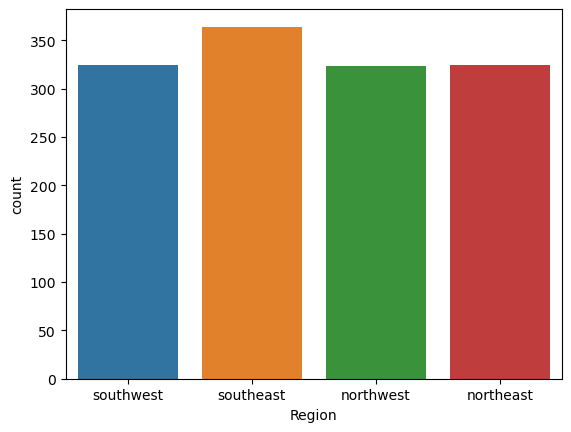

In [110]:
sns.countplot(x = data['Region'])
plt.show()

 The region variable contains 4 different locations where southeast location has many customers followed by northeast,southeast and nothwest.

data1[data1.duplicated(keep = False)]

data1 = data1.drop_duplicates()

In [111]:
import numpy as np
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off # mean - 3 sigma 
    upper_limit = random_data_mean + anomaly_cut_off  # mean + 3 sigma

    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies 

In [112]:
find_anomalies(data['BMI'].sort_values(ascending = True))

[49.06, 50.38, 52.58, 53.13]

In [113]:
find_anomalies(data['Children'].sort_values(ascending = True))

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [114]:
data.describe()

,Age,BMI,Children,Charges
count,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.179801,30.631189,1.095131,13277.238554
std,13.909720,6.054466,1.206218,12113.150034
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.698450
50%,39.179801,30.495000,1.000000,9386.161300
75%,51.000000,34.430000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


In [115]:
Q1 = 26.180000
Q3 = 34.520000
IQR = Q3 - Q1

In [116]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [117]:
# capping outliers
data['BMI'] = data['BMI'].clip(lower = lower_limit,upper = upper_limit)

# Data Exploration

Distribution of continuous variable

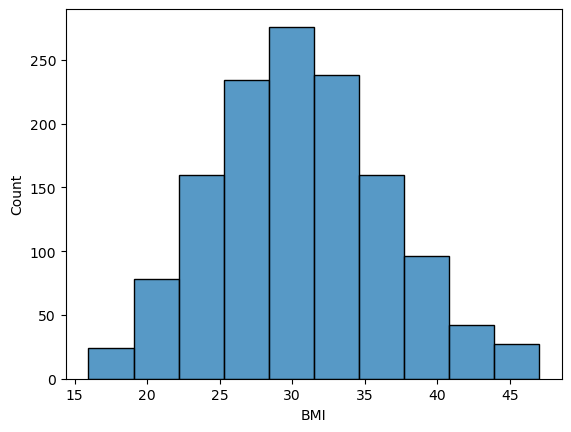

In [118]:
sns.histplot(data, x="BMI",bins =10)
plt.show()

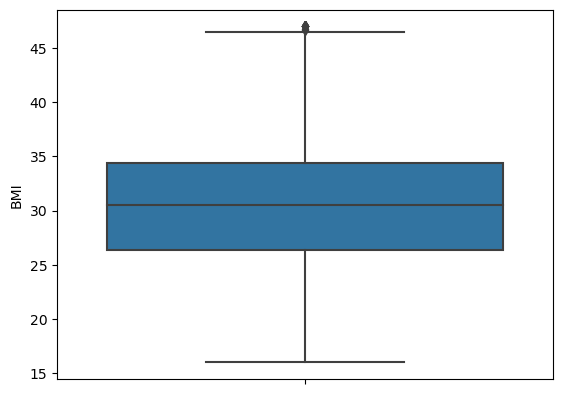

In [119]:
sns.boxplot(data, y = "BMI")
plt.show()

- More no of customers between BMI range of 27 to 31.

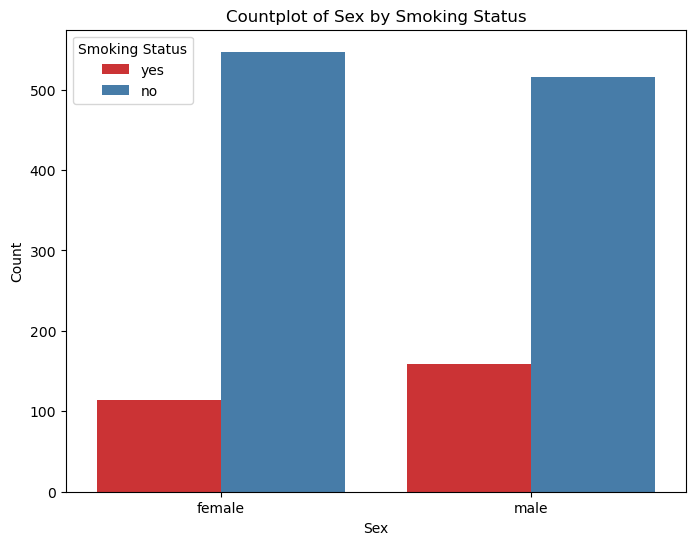

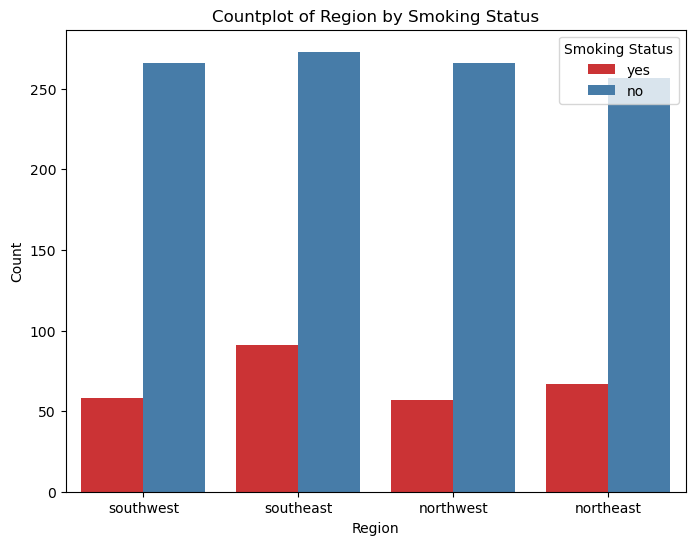

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data1' is your DataFrame
columns = data[['Sex','Region']]
# Drop the 'Smoking_status' column from predictors

# Loop through each predictor
for i, predictor in enumerate(columns):
    plt.figure(i, figsize=(8, 6))  # Adjust the figure size as needed
    sns.countplot(data=data, x=predictor, hue='Smoking_status', palette='Set1')
    plt.title(f'Countplot of {predictor} by Smoking Status')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.legend(title='Smoking Status')
    plt.show()

In [121]:
data

,Age,Sex,BMI,Children,Smoking_status,Region,Charges
0,19.0,female,30.631189,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970000,3,no,northwest,10600.54830
1334,18.0,female,31.920000,0,no,northeast,2205.98080
1335,18.0,female,36.850000,0,no,southeast,1629.83350
1336,21.0,female,25.800000,0,no,southwest,2007.94500


In [122]:
corr = data[['Age','BMI','Charges']].corr()
#sns.heatmap(corr, annot = True)
#plt.show()
corr

,Age,BMI,Charges
Age,1.000000,0.111512,0.293840
BMI,0.111512,1.000000,0.195859
Charges,0.293840,0.195859,1.000000


Text(0.5, 1.0, 'Spearman Correlation')

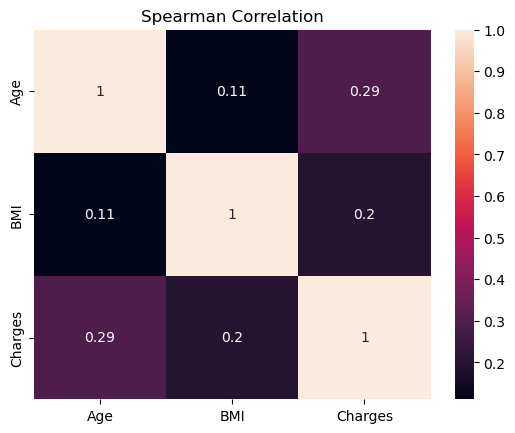

In [123]:
import matplotlib.pyplot as plt
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, annot = True)
plt.title("Spearman Correlation")

## Categorical

In [124]:
pd.value_counts(data['Sex'])

Sex
male      674
female    661
Name: count, dtype: int64

In [125]:
pd.value_counts(data['Region'])

Region
southeast    364
southwest    324
northeast    324
northwest    323
Name: count, dtype: int64

In [126]:
pd.value_counts(data['Smoking_status'])

Smoking_status
no     1062
yes     273
Name: count, dtype: int64

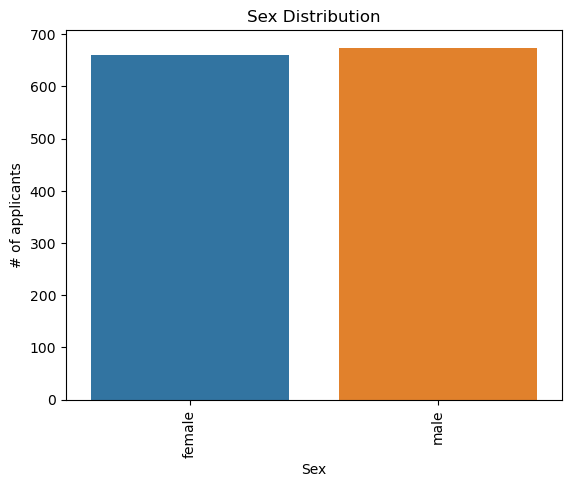

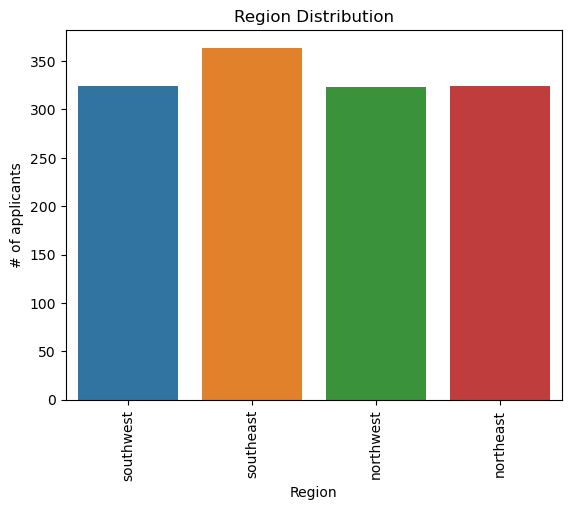

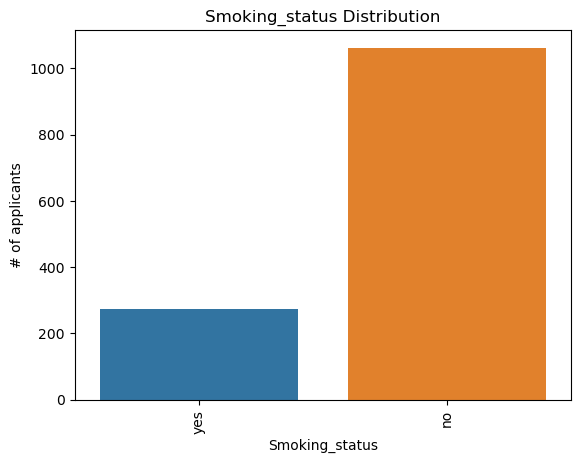

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cat = data[['Sex', 'Region','Smoking_status']]

for column in df_cat.columns:
    sns.countplot(x=column, data=df_cat)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("# of applicants")
    plt.xticks(rotation=90)
    plt.show()


From the above graphs we can say:
- The applicants are equal in gender.
- More no of applicants from southeast and other three loaction are relatively equal in number.
- More no of applicants are non smokers.

## Analysis by Group

<Axes: xlabel='Sex', ylabel='Charges'>

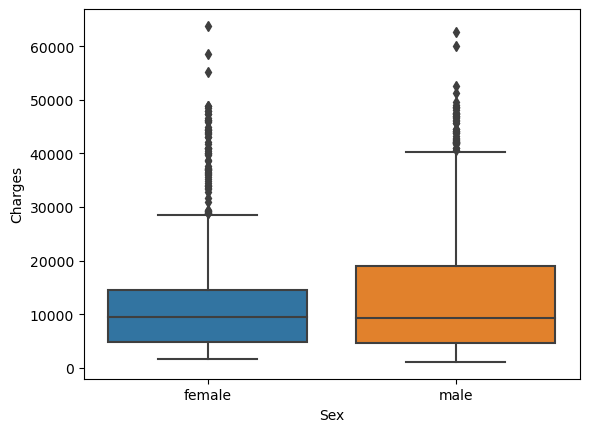

In [128]:
# A plot to see Gender vs credit amount

sns.boxplot(x ='Sex', y ='Charges', data = data)

<Axes: xlabel='Sex', ylabel='Charges'>

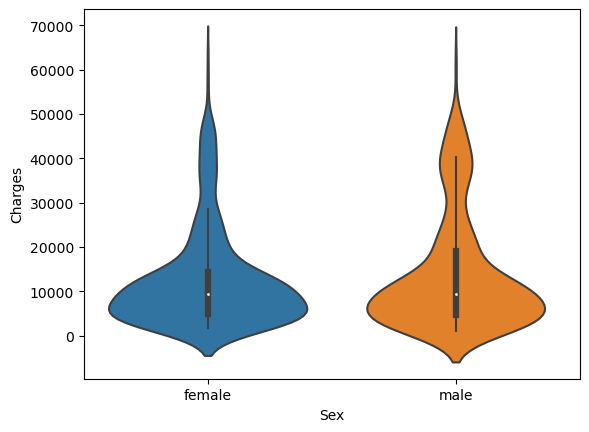

In [129]:
sns.violinplot(x ='Sex', y ='Charges', data = data)

<Axes: xlabel='Smoking_status', ylabel='Charges'>

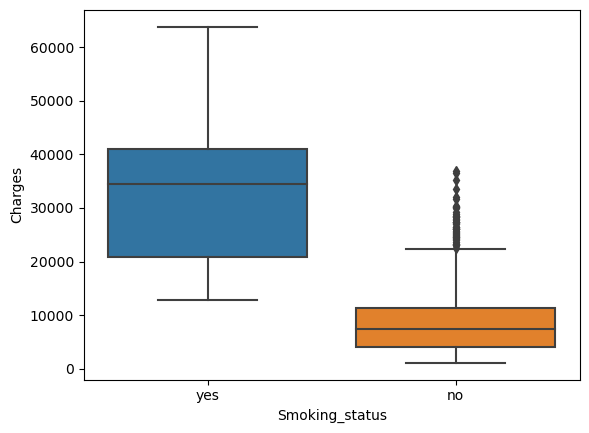

In [130]:

sns.boxplot(x ='Smoking_status', y ='Charges', data = data)

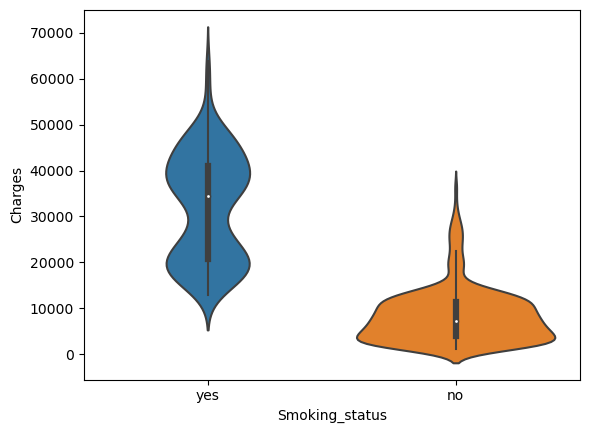

In [131]:
sns.violinplot(x='Smoking_status',y='Charges',data=data)
plt.show()

- The insurance price is higher for smokers.
- For non-smokers the price of insurance is realtively lower and there are few exceptions like the insurance price it depend upon on the age,health condition etc.

In [132]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.

data["Region"].unique()
sex_location = pd.crosstab(data['Region'], data['Sex']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
sex_location

Sex,female,male
Region,,
northeast,24.357035,24.183976
northwest,24.659607,23.738872
southeast,26.475038,28.041543
southwest,24.508321,24.035608


Men from southeast have more applicants in other location the ratio is similar with gender

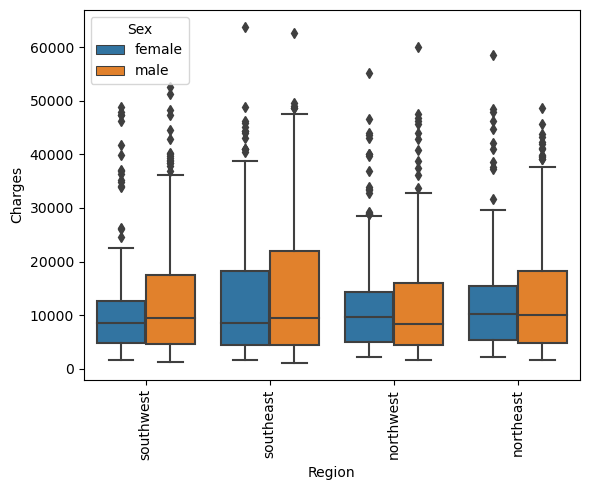

In [133]:
# Credit distribution by purpose
sns.boxplot(x ='Region', y = 'Charges', data = data, hue ='Sex')
plt.xticks(rotation = 90)
plt.show()

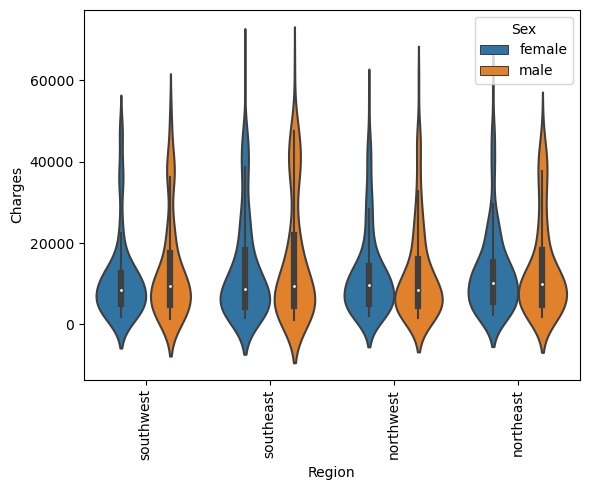

In [134]:
# Credit distribution by purpose
sns.violinplot(x ='Region', y = 'Charges', data = data, hue ='Sex')
plt.xticks(rotation = 90)
plt.show()

Age groups:
In this section we will create categorical groups based on the age column. The following categorical variables will belong to the "Age_Group" column:

-> Young Adult: Clients age ranges from (19 - 25).

-> Adults: Clients age ranges from (25-45)

-> Senior: Clients age ranges from (46-60)

-> Elder: Clients age is more than 60 years old

data['Age_Group'] = np.nan

lst = [data]

for col in lst:
    col.loc[(col['Age'] >= 18) & (col['Age'] <= 25), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 25) & (col['Age'] <= 45), 'Age_Group'] = 'Adults'
    col.loc[(col['Age'] > 45) & (col['Age'] <= 60), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 60, 'Age_Group'] = 'Elder'

data1.head()

In [135]:
def Age(x):
    if x >= 18 and x <= 25:
        return 'Young Adults'
    elif x > 25 and x <= 45:
        return 'Adults'
    elif x > 45 and x <= 60:
        return 'Senior'
    else:
        return 'Elder'


data['Age_Group'] = data['Age'].apply(Age)
data.head()

,Age,Sex,BMI,Children,Smoking_status,Region,Charges,Age_Group
0,19.0,female,30.631189,0,yes,southwest,16884.92400,Young Adults
1,18.0,male,33.770000,1,no,southeast,1725.55230,Young Adults
2,28.0,male,33.000000,3,no,southeast,4449.46200,Adults
3,33.0,male,22.705000,0,no,northwest,21984.47061,Adults
4,32.0,male,28.880000,0,no,northwest,3866.85520,Adults


In [136]:
single = data[data['Children'] == 0]

In [137]:
single['Age'].value_counts()

Age
18.000000    50
19.000000    48
24.000000    23
58.000000    21
60.000000    19
22.000000    18
20.000000    17
21.000000    16
62.000000    16
56.000000    16
63.000000    16
61.000000    15
57.000000    15
27.000000    14
64.000000    13
23.000000    13
55.000000    11
25.000000    11
51.000000    10
28.000000    10
36.000000    10
26.000000    10
53.000000    10
39.179801    10
42.000000    10
48.000000    10
59.000000    10
52.000000     9
29.000000     9
50.000000     9
54.000000     8
45.000000     8
33.000000     8
31.000000     8
37.000000     7
49.000000     7
34.000000     7
32.000000     6
43.000000     6
44.000000     6
41.000000     5
46.000000     5
30.000000     5
39.000000     4
38.000000     4
40.000000     4
47.000000     4
35.000000     2
Name: count, dtype: int64

- The individual insurance was taken by more young adults between 18 to 25.
- In females the individual insurance was high in Young-Adults followed by Adults,senior,Elder etc
- In males the individual insurance was higher in Young-Adults followed by seniors rather than Adults.

In [138]:
data['Age_Group'].isnull().sum()

0

In [139]:
#< 19.5 (Underweight)
#Between 19.5 and 25 (normal weight)
#> 25 and < 30 (overweight)
#>= 30 (Obese)

def BMI_category(x):
    if x < 19.5:
        return 'Underweight'
    elif x > 19.5 and x < 25:
        return 'Normalweight'
    elif x > 25 and x < 30:
        return 'Overweight'
    else:
        return 'Obese'


data['BMI_Cat'] = data['BMI'].apply(BMI_category)
data.head()

,Age,Sex,BMI,Children,Smoking_status,Region,Charges,Age_Group,BMI_Cat
0,19.0,female,30.631189,0,yes,southwest,16884.92400,Young Adults,Obese
1,18.0,male,33.770000,1,no,southeast,1725.55230,Young Adults,Obese
2,28.0,male,33.000000,3,no,southeast,4449.46200,Adults,Obese
3,33.0,male,22.705000,0,no,northwest,21984.47061,Adults,Normalweight
4,32.0,male,28.880000,0,no,northwest,3866.85520,Adults,Overweight


In [140]:
data['Children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

<Axes: xlabel='Age_Group', ylabel='Charges'>

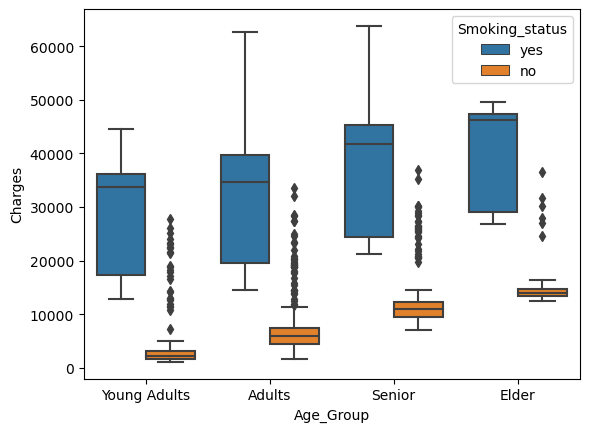

In [141]:
sns.boxplot(x ='Age_Group', y ='Charges', data = data,hue = 'Smoking_status')

- As the age increases the insurance increases with there smoking status.also the insurance price is higher for young_adults with smoking.
- some of the Senior age group paying higher insurance price then elder age group followed by adults.

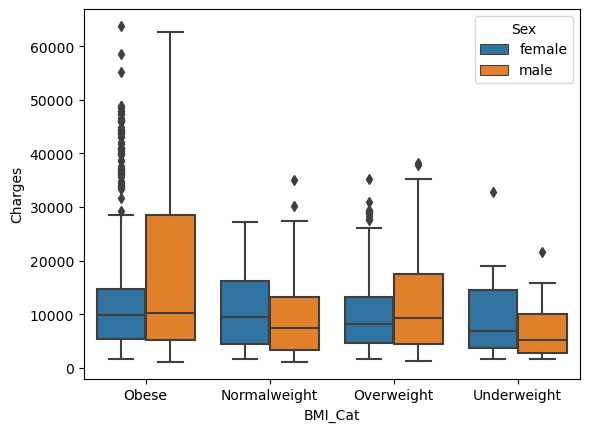

In [142]:
# A plot of Job vs Credit amount

sns.boxplot(data=data, x="BMI_Cat", y="Charges",hue='Sex')
plt.show()

- The health insurance price is high for obese type of BMI and low for underweight. 

<Axes: xlabel='Children', ylabel='Charges'>

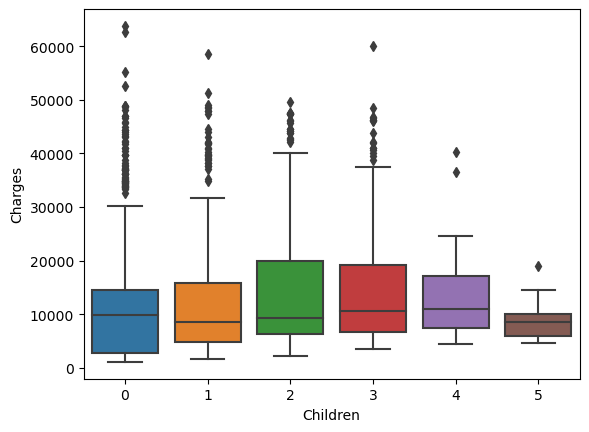

In [143]:
sns.boxplot(x="Children",y="Charges",data=data)

- The insurance charges is inverse propotional to the number of childrens.
- Price of premium is high for people with no childrens (bachelors),may be there are more people with smoking habit. 

In [144]:
# Round the 'values' column to 2 decimal places
data['Charges'] = data['Charges'].apply(lambda x: round(x, 2))

In [145]:
data['BMI'] = data['BMI'].apply(lambda x: round(x,2))

In [146]:
data

,Age,Sex,BMI,Children,Smoking_status,Region,Charges,Age_Group,BMI_Cat
0,19.0,female,30.63,0,yes,southwest,16884.92,Young Adults,Obese
1,18.0,male,33.77,1,no,southeast,1725.55,Young Adults,Obese
2,28.0,male,33.00,3,no,southeast,4449.46,Adults,Obese
3,33.0,male,22.70,0,no,northwest,21984.47,Adults,Normalweight
4,32.0,male,28.88,0,no,northwest,3866.86,Adults,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.97,3,no,northwest,10600.55,Senior,Obese
1334,18.0,female,31.92,0,no,northeast,2205.98,Young Adults,Obese
1335,18.0,female,36.85,0,no,southeast,1629.83,Young Adults,Obese
1336,21.0,female,25.80,0,no,southwest,2007.94,Young Adults,Overweight


In [147]:
data['Children'] = data['Children'].astype('int')

In [148]:
data.dtypes

Age               float64
Sex                object
BMI               float64
Children            int32
Smoking_status     object
Region             object
Charges           float64
Age_Group          object
BMI_Cat            object
dtype: object

def conversion(data_):
    m = data_.shape[0]
    n = data_.shape[1]  # Corrected attribute name

    for i in range(m):`
        for j in range(n):
            data_[i, j] = int(data_[i, j])  # Direct boolean-to-integer conversion

    return data_

In [149]:
data.isnull().sum()

Age               0
Sex               0
BMI               0
Children          0
Smoking_status    0
Region            0
Charges           0
Age_Group         0
BMI_Cat           0
dtype: int64

In [150]:
data1 = data.drop(columns = ['Age_Group','BMI_Cat'])

# Data Wrangling

In [151]:
x = data1['BMI'].skew()
print(x)
y = data1['Age'].skew()
print(y)

0.2424094558525568
0.05739018383635916


Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

# Encoding

encoding is to be done for discrete categorical data (sex,smoker,region).

In [152]:
data1['Sex']=data1['Sex'].map({'male':0,'female':1})
data1['Smoking_status']=data1['Smoking_status'].map({'yes':1,'no':0})
data1['Region']=data1['Region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

# Model Development
There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

In [153]:
X = data1.drop(['Charges'],axis=1)
Y = data1[['Charges']]

In [154]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
    df=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df

After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 46 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.

Now let’s train some state-of-the-art machine learning models on the training data and then use the validation data for choosing the best out of them for prediction.

In [155]:
X

,Age,Sex,BMI,Children,Smoking_status,Region
0,19.0,1,30.63,0,1,3
1,18.0,0,33.77,1,0,2
2,28.0,0,33.00,3,0,2
3,33.0,0,22.70,0,0,0
4,32.0,0,28.88,0,0,0
...,...,...,...,...,...,...
1333,50.0,0,30.97,3,0,0
1334,18.0,1,31.92,0,0,1
1335,18.0,1,36.85,0,0,2
1336,21.0,1,25.80,0,0,3


In [156]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state = 0)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print('linear regression:')
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

linear regression:
0.7402422543771761
0.75477534562284
0.741944136573484


In [157]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print('SVM:')
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

C:\Users\soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM:
-0.09328973987557765
-0.17061336912681258


C:\Users\soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.10396576156941588


C:\Users\soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
import warnings
warnings.filterwarnings("ignore")
rfmodel=RandomForestRegressor(random_state=0)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9737984924244438
0.8569509422890234
0.8257456034507633


In [159]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=46)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'n_estimators': 98}


In [160]:
import warnings
warnings.filterwarnings("ignore")
rfmodel=RandomForestRegressor(random_state=0,n_estimators=98)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9738842108297846
0.8568860545404713
0.8259966525999584


In [161]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.8925533753425746
0.8677794221909767
0.8441287494094574


In [162]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'learning_rate': 0.2, 'n_estimators': 20}


In [163]:
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean()) 

0.8669320694156584
0.8736135009730114
0.8504870570577129


In [164]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.9948042692133046
0.8245922797029818
0.7951131027034132


In [165]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}


In [166]:
xgmodel=XGBRegressor(n_estimators=10,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.8618433356842254
0.8798965425675368
0.850220890359904


In [167]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
Age,0.040629
Sex,0.000000
BMI,0.105832
Children,0.008859
Smoking_status,0.837709
Region,0.006970


In [168]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
Age,0.040629
BMI,0.105832
Smoking_status,0.837709


# Final Model:

In [170]:
data1

,Age,Sex,BMI,Children,Smoking_status,Region,Charges
0,19.0,1,30.63,0,1,3,16884.92
1,18.0,0,33.77,1,0,2,1725.55
2,28.0,0,33.00,3,0,2,4449.46
3,33.0,0,22.70,0,0,0,21984.47
4,32.0,0,28.88,0,0,0,3866.86
...,...,...,...,...,...,...,...
1333,50.0,0,30.97,3,0,0,10600.55
1334,18.0,1,31.92,0,0,1,2205.98
1335,18.0,1,36.85,0,0,2,1629.83
1336,21.0,1,25.80,0,0,3,2007.94


# Final Model

In [171]:
data1.drop(data1[['Sex','Region','Children']],axis=1,inplace=True) 

In [172]:
Xf=data1.drop(data1[['Charges']],axis=1)
X=data1.drop(data1[['Charges']],axis=1)

In [173]:
# XGBRegressor
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=46)
finalmodel=XGBRegressor(n_estimators=10,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())

0.8609243022899671
0.8585109992872296
0.8463983531586466


In [174]:
# GradientBoostingRegressor
finalmodel1=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
finalmodel1.fit(xtrain,ytrain)
ypredtrain5=finalmodel1.predict(xtrain)
ypredtest5=finalmodel1.predict(xtest)
print(r2_score(ytrain,ypredtrain5))
print(r2_score(ytest,ypredtest5))
print(cross_val_score(finalmodel1,X,Y,cv=5,).mean())

0.8664264529841121
0.853619911595334
0.8433335652049687


In [175]:
# RandomForestRegressor
finalmodel2=RandomForestRegressor(random_state=0,n_estimators=98)
finalmodel2.fit(xtrain,ytrain)
ypredtrain6=finalmodel2.predict(xtrain)
ypredtest6=finalmodel2.predict(xtest)
print(r2_score(ytrain,ypredtrain6))
print(r2_score(ytest,ypredtest6))
print(cross_val_score(finalmodel2,X,Y,cv=5,).mean())

0.9701793358552969
0.8024138092486818
0.7944355219871296


In [176]:
finalmodel3=SVR()
finalmodel3.fit(xtrain,ytrain)
ypredtrain7=finalmodel3.predict(xtrain)
ypredtest7=finalmodel3.predict(xtest)
print('SVM:')
print(r2_score(ytrain,ypredtrain7))
print(r2_score(ytest,ypredtest7))
print(cross_val_score(finalmodel3,X,Y,cv=5,).mean())

SVM:
-0.09823544582190813
-0.08151718062157087
-0.10375871833921195


In [177]:
finalmodel4=LinearRegression()
finalmodel4.fit(xtrain,ytrain)
ypredtrain9=finalmodel4.predict(xtrain)
ypredtest9=finalmodel4.predict(xtest)
print('linear regression:')
print(finalmodel4.score(xtrain,ytrain))
print(finalmodel4.score(xtest,ytest))
print(r2_score(ytrain,ypredtrain9))
print(r2_score(ytest,ypredtest9))
print(cross_val_score(finalmodel4,X,Y,cv=10,).mean())

linear regression:
0.7421456592536979
0.7408344941554468
0.7421456592536979
0.7408344941554468
0.737750847854076


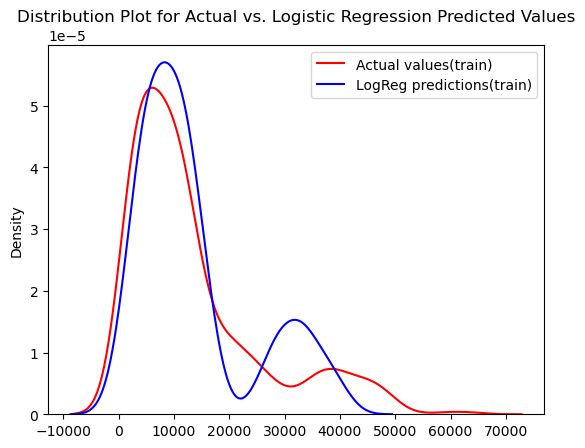

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

# Create a distplot for actual target values
sns.distplot(ytrain, hist=False, color='r', label='Actual values(train)')

# Create a distplot for logistic regression predicted values
sns.distplot(ypredtrain9, hist=False, color='b', label='LogReg predictions(train)')

# Show the plot
plt.title("Distribution Plot for Actual vs. Logistic Regression Predicted Values")
plt.legend()
plt.show()

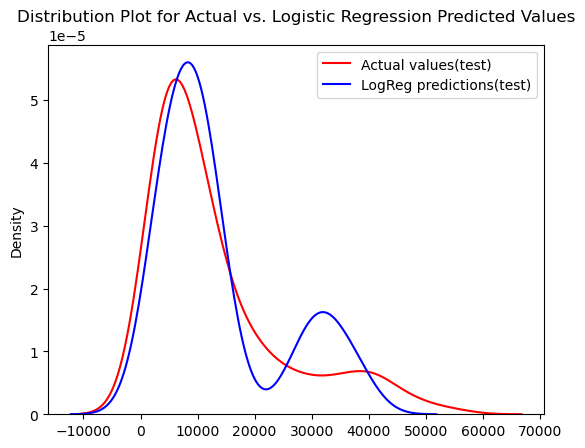

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

# Create a distplot for actual target values
sns.distplot(ytest, hist=False, color='r', label='Actual values(test)')

# Create a distplot for logistic regression predicted values
sns.distplot(ypredtest9, hist=False, color='b', label='LogReg predictions(test)')

# Show the plot
plt.title("Distribution Plot for Actual vs. Logistic Regression Predicted Values")
plt.legend()
plt.show()